In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [19]:
df = pd.read_csv("input/price4.csv")
df.head()

,x5202,x7272,x4927,x4502
0,55,682,2460,3595
1,56,672,2543,3575
2,56,668,2544,3570
3,57,674,2500,3500
4,60,711,2535,3545


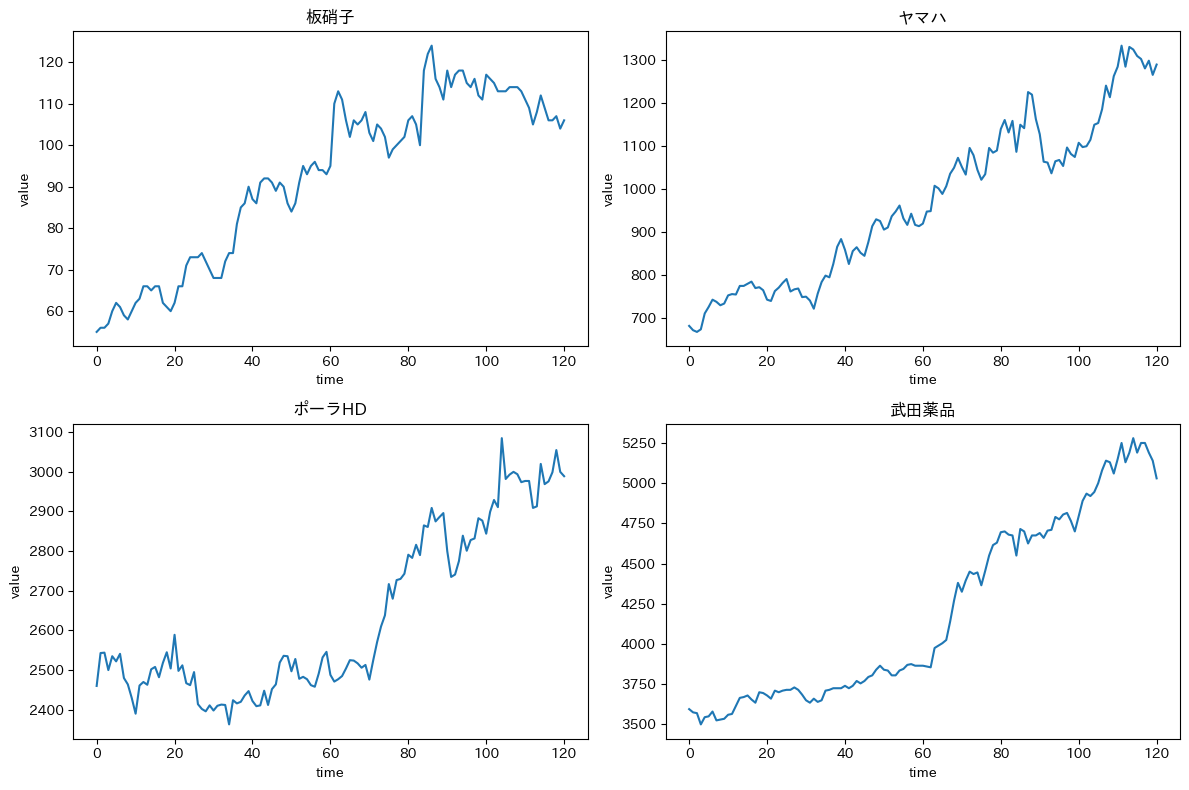

In [17]:

def myplot():
    name_map = {
        "x5202": "板硝子",
        "x4927": "ポーラHD",
        "x7272": "ヤマハ",
        "x4502": "武田薬品",
    }
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    for i, col in enumerate(df.columns):
        ax = axs[i // 2, i % 2]
        ax.plot(df[col])
        ax.set_title(name_map[col])
        ax.set_xlabel("time")
        ax.set_ylabel("value")
    
    plt.tight_layout()
    plt.show()
myplot()

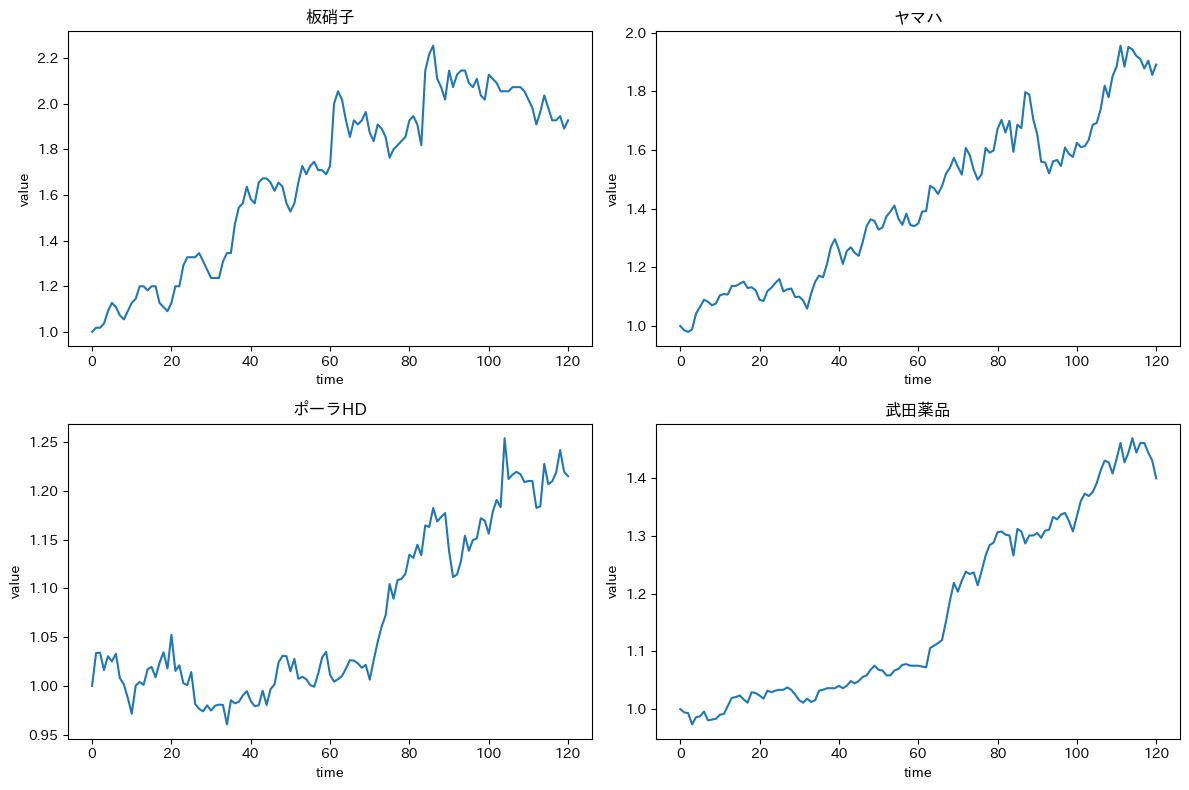

In [18]:

def rate():
    for c in df.columns:
        df[c] = df[c] / df[c][0]
# rate()
myplot()

In [ ]:
df = pd.read_csv("input/price4.csv")


In [21]:
import numpy as np


def logdiff():
    for col in df.columns:
        df[f"{col}_log"] = np.log(df[col])
        df[f"{col}_logdiff"] = df[f"{col}_log"].diff()

# logdiff()
df.head()

,x5202,x7272,x4927,x4502,x5202_log,x5202_logdiff,x7272_log,x7272_logdiff,x4927_log,x4927_logdiff,x4502_log,x4502_logdiff
0,55,682,2460,3595,4.007333,NaN,6.525030,NaN,7.807917,NaN,8.187299,NaN
1,56,672,2543,3575,4.025352,0.018019,6.510258,-0.014771,7.841100,0.033183,8.181720,-0.005579
2,56,668,2544,3570,4.025352,0.000000,6.504288,-0.005970,7.841493,0.000393,8.180321,-0.001400
3,57,674,2500,3500,4.043051,0.017700,6.513230,0.008942,7.824046,-0.017447,8.160518,-0.019803
4,60,711,2535,3545,4.094345,0.051293,6.566672,0.053442,7.837949,0.013903,8.173293,0.012775


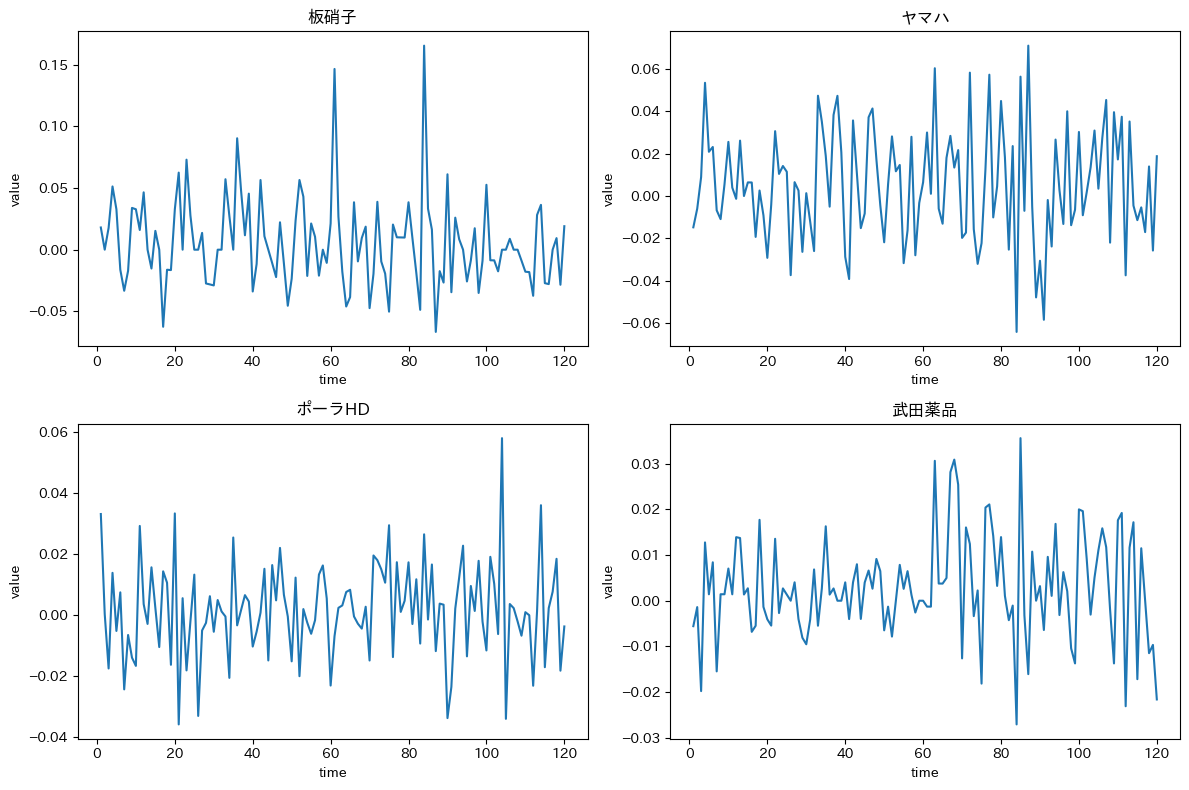

In [24]:
name_map = {
    "x5202_logdiff": "板硝子",
    "x4927_logdiff": "ポーラHD",
    "x7272_logdiff": "ヤマハ",
    "x4502_logdiff": "武田薬品",
}
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(df.columns):
    j = (i - 4) // 2
    if "_logdiff" in col:
        ax = axs[j // 2, j % 2]
        ax.plot(df[col])
        ax.set_title(name_map[col])
        ax.set_xlabel("time")
        ax.set_ylabel("value")

plt.tight_layout()
plt.show()

# ポイント
- 縦軸のスケールを一致させ、変動の大きさを比較した
    - log & diff